<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

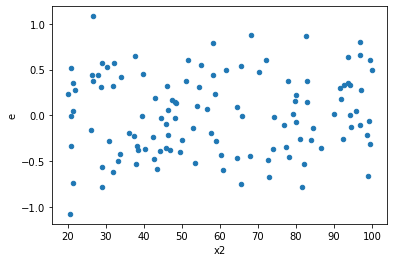

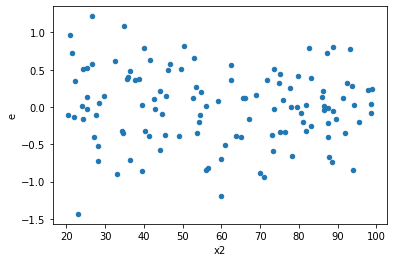

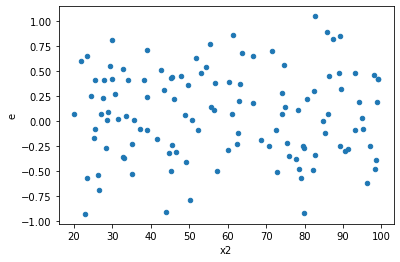

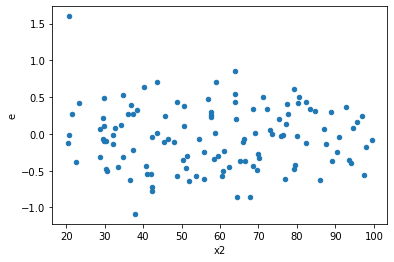

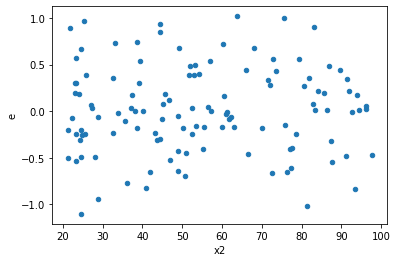

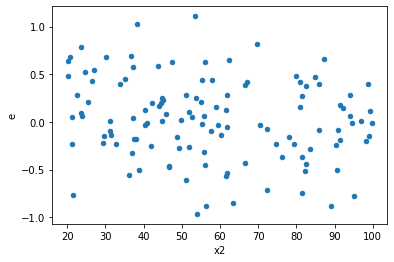

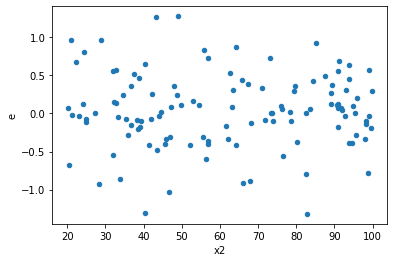

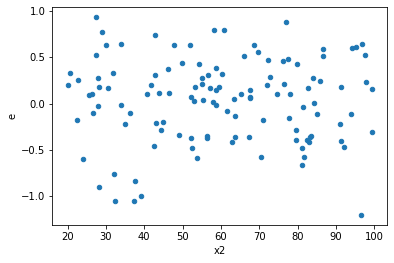

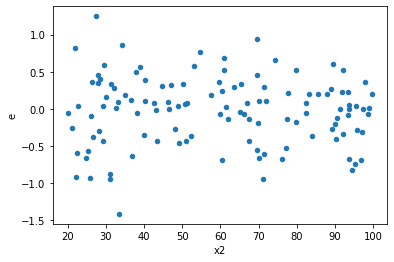

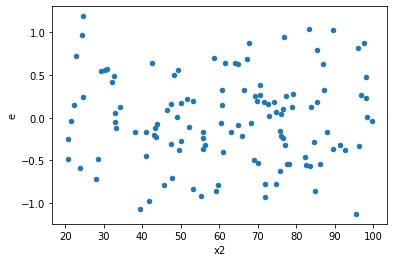

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,61.0,53.0,11.682028978080861,16.968358314367602,0.1915086717718174,0.32015770404467175,1.6717660933189473,0.057596786332534844,0.9712016068337326,0.028798393166267422,Reject001=1 : Homoscedasticity
2.0,58.0,56.0,8.652907047618205,11.183043318828172,0.14918805254514148,0.19969720212193165,1.3385602849229972,0.2751155607936937,0.8624422196031531,0.13755778039684685,Reject001=1 : Homoscedasticity
3.0,63.0,51.0,10.353790124099874,10.099967838772674,0.16434587498571226,0.198038585073974,1.2050109872924457,0.4934324719539407,0.7532837640230297,0.24671623597697034,Reject001=1 : Homoscedasticity
6.0,62.0,52.0,14.583092505763144,12.300801471748088,0.23521116944779263,0.23655387445669399,1.0057085087075313,0.9892182120818052,0.5053908939590974,0.4946091060409026,Reject001=1 : Homoscedasticity
7.0,63.0,51.0,11.10409496239803,11.650148480679123,0.1762554755936195,0.22843428393488477,1.296040779246884,0.3400286095455265,0.8299856952272368,0.17001430477276325,Reject001=1 : Homoscedasticity
8.0,71.0,43.0,10.10364011332963,13.85913530218504,0.14230479032858634,0.32230547214383815,2.2648954501083516,0.004708661534747582,0.9976456692326262,0.002354330767373791,Reject001=0 : Heteroscedasticity
9.0,62.0,52.0,14.58795528596217,14.827748429512203,0.2352896013864866,0.28514900825985007,1.211906546568815,0.47819995463190956,0.7609000226840452,0.23909997731595478,Reject001=1 : Homoscedasticity
10.0,47.0,67.0,10.077834857710469,14.409713341280785,0.2144220182491589,0.21507034837732514,1.003023617319994,0.9785011427032031,0.5107494286483985,0.48925057135160155,Reject001=1 : Homoscedasticity
11.0,55.0,59.0,11.092911009538287,15.159538337277917,0.20168929108251432,0.2569413277504732,1.2739463080632991,0.3613965589413648,0.8193017205293176,0.1806982794706824,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,67.0,9.201575537648235,10.967053955451004,0.19577820292868586,0.16368737246941797,0.836085784938187,0.5203992432287551,Reject001=1 : Homoscedasticity
1.0,61.0,53.0,11.682028978080861,16.968358314367602,0.1915086717718174,0.32015770404467175,1.6717660933189473,0.057596786332534844,Reject001=1 : Homoscedasticity
2.0,58.0,56.0,8.652907047618205,11.183043318828172,0.14918805254514148,0.19969720212193165,1.3385602849229972,0.2751155607936937,Reject001=1 : Homoscedasticity
3.0,63.0,51.0,10.353790124099874,10.099967838772674,0.16434587498571226,0.198038585073974,1.2050109872924457,0.4934324719539407,Reject001=1 : Homoscedasticity
4.0,58.0,56.0,12.521928420578025,11.982637207574538,0.21589531759617284,0.21397566442097388,0.991108407553379,0.9719867494510905,Reject001=1 : Homoscedasticity
5.0,53.0,61.0,10.392149217700425,8.242184131285892,0.1960782871264231,0.13511777264403102,0.6891011474254297,0.1676265799496932,Reject001=1 : Homoscedasticity
6.0,62.0,52.0,14.583092505763144,12.300801471748088,0.23521116944779263,0.23655387445669399,1.0057085087075313,0.9892182120818052,Reject001=1 : Homoscedasticity
7.0,63.0,51.0,11.10409496239803,11.650148480679123,0.1762554755936195,0.22843428393488477,1.296040779246884,0.3400286095455265,Reject001=1 : Homoscedasticity
8.0,71.0,43.0,10.10364011332963,13.85913530218504,0.14230479032858634,0.32230547214383815,2.2648954501083516,0.004708661534747582,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      967
Reject001=0 : Heteroscedasticity     33
Name: Result_test, dtype: int64